In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import quote
from datetime import datetime, timedelta
cwbstnweburl = "https://e-service.cwb.gov.tw/wdps/obs/state.htm"
cwbstn=requests.get(cwbstnweburl)
cwbstn.encoding = "utf-8"
tablecwbstn = BeautifulSoup(cwbstn.text,'lxml').find_all("table")
cwbstndf = pd.read_html(str(tablecwbstn), encoding = "utf-8",index_col=0)[0]


def getdata_day(stndf, stnumber, timemesag):
    header = ['ObsTime', 'StnPres', 'SeaPres', 'Temperature', 'Td dew point', \
          'RH', 'WS', 'WD', 'WSGust', 'WDGust', 'Precp', 'PrecpHour', 'SunShine', \
          'GloblRad', 'Visb', 'UVI', 'Cloud Amount'] 
    webmaster="https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do"
    webstn = "?command=viewMain&station={}".format(str(stnumber))
    stnchtname = stndf.loc[str(stnumber)]["站名"]
    stnaltitude = stndf.loc[str(stnumber)]["海拔高度(m)"]
    stnname = quote(stnchtname.encode("utf-8")).replace("%","%25")
    webputstnname = "&stname={}".format(stnname)
    webpickdate = "&datepicker={}".format(timemesag)
    webpickaltint = "&altitude={}m".format(int(stnaltitude))
    webpickaltfloat = "&altitude={}m".format(stnaltitude)
    weburl_a = webmaster + webstn + webputstnname + webpickdate + webpickaltint
    webur1_b = webmaster + webstn + webputstnname + webpickdate + webpickaltfloat
    #print(weburl)
    try:
        print(weburl_a)
        a = requests.get(weburl_a)
        table = BeautifulSoup(a.text,"lxml").find_all("table")
    except:
        print(weburl_b)
        a = requests.get(weburl_b)
        table = BeautifulSoup(a.text,"lxml").find_all("table")    
    dftmp = pd.read_html(str(table))[1]
    dftmp.columns = header
    return dftmp

def getdata_month(stndf, stnumber, timemesag):
    header = ["ObsTime","StnPres","SeaPres","StnPresMax","StnPresMaxTime","StnPresMin","StnPresMinTime", 
              "Temperature", "T Max", "T Max Time", "T Min", "T Min Time", "Td dew point", "RH", "RHMin",
             "RHMinTime","WS","WD","WSGust","WDGust","WGustTime","Precp","PrecpHour","PrecpMax10","PrecpMax10Time",
             "PrecpMax60","PrecpMax60Time","SunShine","SunShineRate","GlobRad","VisbMean","EvapA","UVI MAX", 
             "UVI Max Time", "Cloud Amount"]
    webmaster="https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do"
    webstn = "?command=viewMain&station={}".format(str(stnumber))
    stnchtname = stndf.loc[str(stnumber)]["站名"]
    stnaltitude = stndf.loc[str(stnumber)]["海拔高度(m)"]
    stnname = quote(stnchtname.encode("utf-8")).replace("%","%25")
    webputstnname = "&stname={}".format(stnname)
    webpickdate = "&datepicker={}".format(timemesag)
    webpickaltint = "&altitude={}m".format(int(stnaltitude))
    webpickaltfloat = "&altitude={}m".format(stnaltitude)
    weburl_a = webmaster + webstn + webputstnname + webpickdate + webpickaltint
    webur1_b = webmaster + webstn + webputstnname + webpickdate + webpickaltfloat
    #print(weburl)
    try:
        print(weburl_a)
        a = requests.get(weburl_a)
        table = BeautifulSoup(a.text,"lxml").find_all("table")
    except:
        print(weburl_b)
        a = requests.get(weburl_b)
        table = BeautifulSoup(a.text,"lxml").find_all("table")    
    dftmp = pd.read_html(str(table))[1]
    dftmp.columns = header
    return dftmp

# df = getdata_day(cwbstndf,"466920","2022-09-03")
# print(df)

from datetime import timedelta, date
import pandas as pd

def daterange(start_date, end_date):
    # 產生一個日期範圍的生成器
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + timedelta(n)

start_date = date(2015, 1, 1)
end_date = date(2022, 6, 1)

# 創建一個空的 DataFrame 來儲存所有資料
all_data = pd.DataFrame()

# 遍歷每一天
for single_date in daterange(start_date, end_date):
    df = getdata_day(cwbstndf,"466920",single_date.strftime("%Y-%m-%d"))
    
    # 將爬取日期添加到 DataFrame 中
    df['date'] = single_date
    
    # 使用 pandas 的 concat 函數添加資料
    all_data = pd.concat([all_data, df])

# 列印最終的資料
print(all_data)


all_data.to_csv('data.csv')


https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-01-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-01-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-01-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-01-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-01-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-02-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-02-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-02-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-02-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-02-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-04-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-04-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-04-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-04-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-04-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-05-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-05-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-05-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-05-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-05-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-07-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-07-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-07-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-07-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-07-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-08-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-08-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-08-31&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-09-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-09-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-10-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-10-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-10-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-10-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-10-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-12-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-12-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-12-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-12-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-12-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-01-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-01-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-01-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-01-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-01-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-03-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-03-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-03-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-03-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-03-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-04-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-04-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-04-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-04-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-04-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-06-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-06-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-06-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-06-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-06-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-07-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-07-31&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-08-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-08-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-08-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-09-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-09-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-09-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-09-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-09-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-11-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-11-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-11-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-11-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-11-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-12-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-12-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-12-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-12-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2016-12-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-02-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-02-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-02-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-02-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-02-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-03-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-03-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-03-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-03-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-03-31&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-05-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-05-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-05-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-05-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-05-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-07-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-07-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-07-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-07-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-07-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-08-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-08-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-08-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-08-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-08-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-10-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-10-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-10-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-10-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-10-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-11-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-11-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-11-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-11-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-11-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-01-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-01-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-01-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-01-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-01-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-02-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-02-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-02-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-03-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-03-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-04-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-04-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-04-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-04-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-04-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-06-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-06-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-06-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-06-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-06-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-07-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-07-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-07-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-07-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-07-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-09-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-09-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-09-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-09-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-09-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-10-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-10-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-10-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-10-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-10-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-12-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-12-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-12-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-12-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2018-12-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-01-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-01-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-01-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-01-31&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-02-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-03-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-03-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-03-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-03-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-03-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-05-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-05-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-05-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-05-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-05-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-06-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-06-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-06-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-06-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-06-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-08-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-08-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-08-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-08-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-08-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-09-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-09-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-09-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-09-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-09-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-11-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-11-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-11-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-11-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-11-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-12-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2019-12-31&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-01-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-01-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-01-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-02-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-02-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-02-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-02-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-02-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-04-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-04-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-04-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-04-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-04-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-05-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-05-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-05-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-05-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-05-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-07-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-07-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-07-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-07-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-07-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-08-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-08-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-08-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-08-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-08-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-10-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-10-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-10-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-10-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-10-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-11-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-12-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-12-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-12-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2020-12-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-01-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-01-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-01-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-01-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-01-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-03-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-03-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-03-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-03-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-03-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-04-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-04-24&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-04-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-04-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-04-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-06-10&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-06-11&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-06-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-06-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-06-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-07-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-07-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-07-30&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-07-31&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-08-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-09-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-09-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-09-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-09-17&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-09-18&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-11-01&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-11-02&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-11-03&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-11-04&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-11-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-12-19&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-12-20&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-12-21&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-12-22&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2021-12-23&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-02-05&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-02-06&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-02-07&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-02-08&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-02-09&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-03-25&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-03-26&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-03-27&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-03-28&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-03-29&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-05-12&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-05-13&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-05-14&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-05-15&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2022-05-16&altitude=5m
https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepick

ValueError: x and y must have same first dimension, but have shapes (24,) and (30,)

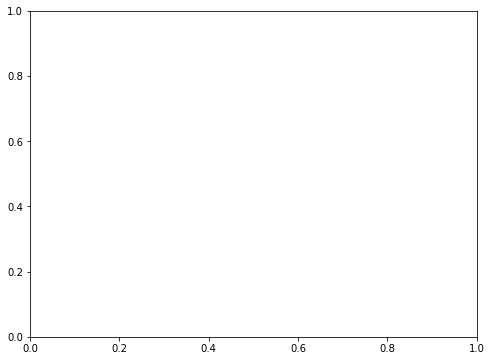

In [7]:
import matplotlib.pyplot as plt
ws = df["WS"]
tmp = df["Temperature"]
fig, ax = plt.subplots(figsize=(8,6))
p1 = ax.plot(range(1,25),ws,label="Wind speed")
ax.set_xticks(range(1,25))
ax.set_xlabel("Hour")
ax.set_ylabel("Wind speed (m/s)")
ax.set_title("Taipei 46692", loc="left")
ax.set_title("2022-09-03", loc="right")
#ax.legend()
ax2 = ax.twinx()
p2 = ax2.plot(range(1,25),tmp,"g-",label="Temperature")
ax2.set_ylabel("Temperature")
#plt.egend([ax.patch,ax2.patch],loc="upper left")
p = p1 +p2
labs = [l.get_label() for l in p]
ax.legend(p, labs, loc='upper left')